In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
      print(os.path.join(dirname, filename))


In [5]:
import plotly.express as px # plotly library
import numpy as np # linear algebra
import pandas as pd

In [33]:
drop = pd.read_csv("/content/dropout-ratio-2012-2015.csv")

water = pd.read_csv("/content/percentage-of-schools-with-water-facility-2013-2016.csv")

gtoilet = pd.read_csv("/content/schools-with-girls-toilet-2013-2016.csv")

comps = pd.read_csv("/content/percentage-of-schools-with-comps-2013-2016 (2).csv")

enrol = pd.read_csv("/content/gross-enrollment-ratio-2013-2016.csv")


In [43]:
drop.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


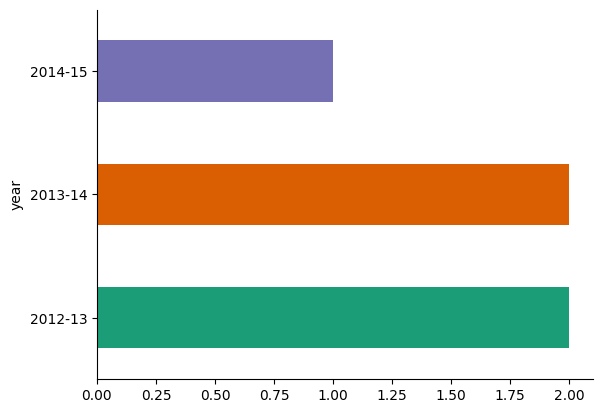

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
# Print the column names
print(drop.columns)

Index(['State_UT', 'year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total'],
      dtype='object')


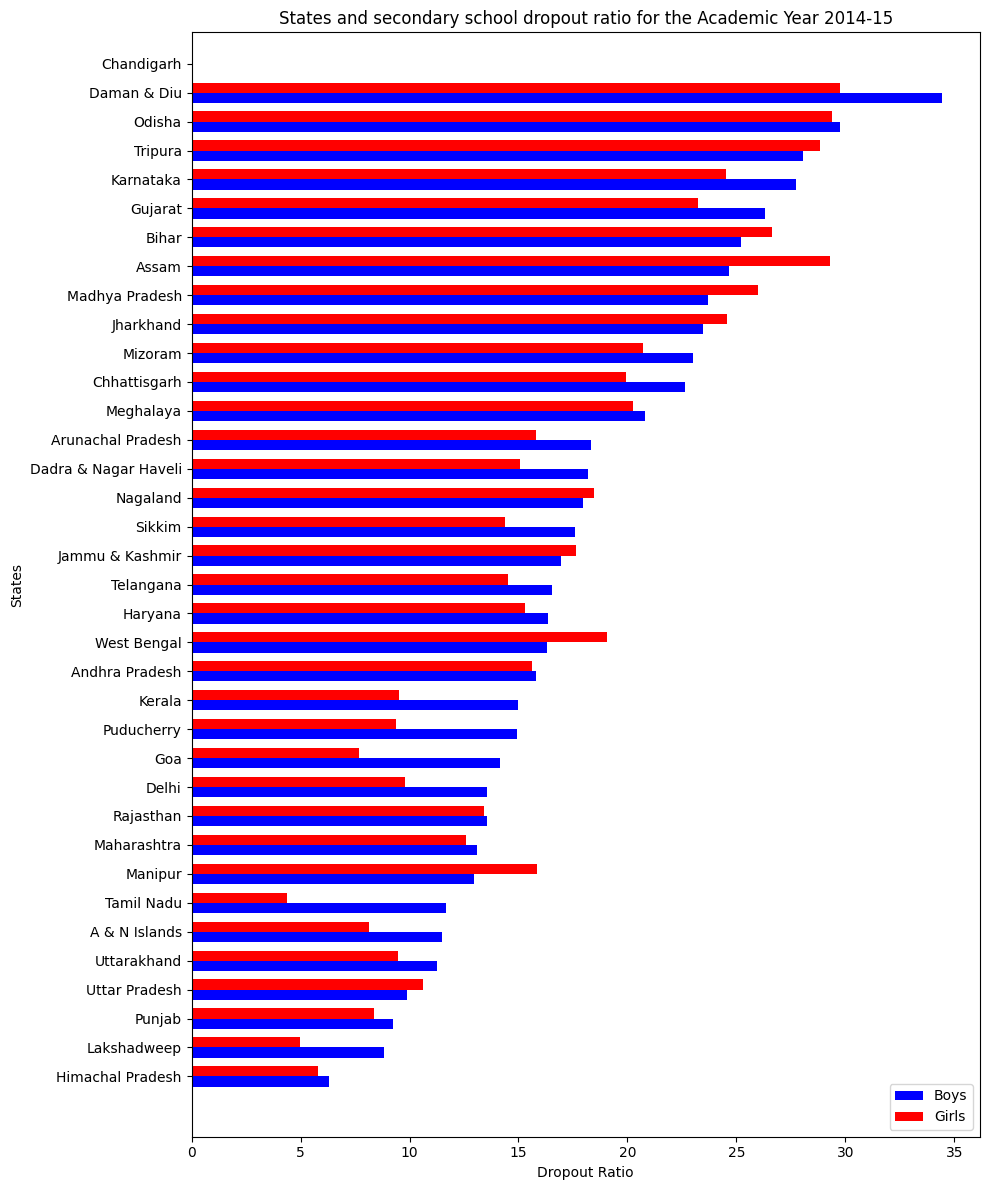

In [10]:
import matplotlib.pyplot as plt
# Filter data for the academic year 2014-15
drop_2014_15 = drop[drop['year'] == '2014-15']

# Remove 'All India' from the data
drop_2014_15 = drop_2014_15[drop_2014_15['State_UT'] != 'All India']

# Select the relevant columns
data_2014_15 = drop_2014_15[['State_UT', 'Secondary _Boys', 'Secondary _Girls']].copy()

# Convert columns to numeric values
data_2014_15['Secondary _Boys'] = pd.to_numeric(data_2014_15['Secondary _Boys'], errors='coerce')
data_2014_15['Secondary _Girls'] = pd.to_numeric(data_2014_15['Secondary _Girls'], errors='coerce')

# Sort the data by 'Secondary _Boys'
data_2014_15 = data_2014_15.sort_values('Secondary _Boys')

# Get the states and the number of states
states = data_2014_15['State_UT']
num_states = len(states)
# Set the width of the bars
bar_width = 0.35

# Generate the y-axis positions for the bars
index = np.arange(num_states)

# Create a figure
fig, ax = plt.subplots(figsize=(10, 12))

# Plot 'Secondary _Boys' bars
boys = ax.barh(index, data_2014_15['Secondary _Boys'], bar_width, color='b', label='Boys')

# Plot 'Secondary _Girls' bars
girls = ax.barh(index + bar_width, data_2014_15['Secondary _Girls'], bar_width, color='r', label='Girls')

# Add labels, title, and legend
ax.set_ylabel('States')
ax.set_xlabel('Dropout Ratio')
ax.set_title('States and secondary school dropout ratio for the Academic Year 2014-15')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(states)
ax.legend()

# Display the bar graph
plt.tight_layout()
plt.show()

In [17]:
# Checking for the missing Chandigarh values

# Filter the data for the state "Chandigarh"
filtered_dropout_data = drop[drop['State_UT'] == 'Chandigarh']

# Print the values for Secondary _Boys and Secondary _Girls
secondary_boys = filtered_data['Secondary _Boys'].values[0]
secondary_girls = filtered_data['Secondary _Girls'].values[0]

print(f"Secondary Boys Dropout Rate in Chandigarh: {secondary_boys}")
print(f"Secondary Girls Dropout Rate in Chandigarh: {secondary_girls}")

Secondary Boys Dropout Rate in Chandigarh: NR
Secondary Girls Dropout Rate in Chandigarh: NR


In [15]:
# Print the column names
print(gtoilet.columns)

Index(['State_UT', 'year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'],
      dtype='object')


In [18]:
print(filtered_dropout_data.columns)

Index(['State_UT', 'year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total'],
      dtype='object')


In [19]:
gtoilet.head()


,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,All India,2013-14,88.68,95.98,98.81,91.39,98.25,97.33,94.40,99.06,98.36,76.14,91.23
1,All India,2014-15,91.21,96.92,99.48,91.39,99.23,98.19,96.61,90.26,94.05,90.94,93.08
2,All India,2015-16,96.95,99.03,99.72,96.32,99.60,99.31,98.82,95.18,98.31,96.22,97.52
3,Andaman & Nicobar Islands,2013-14,89.74,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,93.44
4,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00


In [22]:
!pip install seaborn
import seaborn as sns

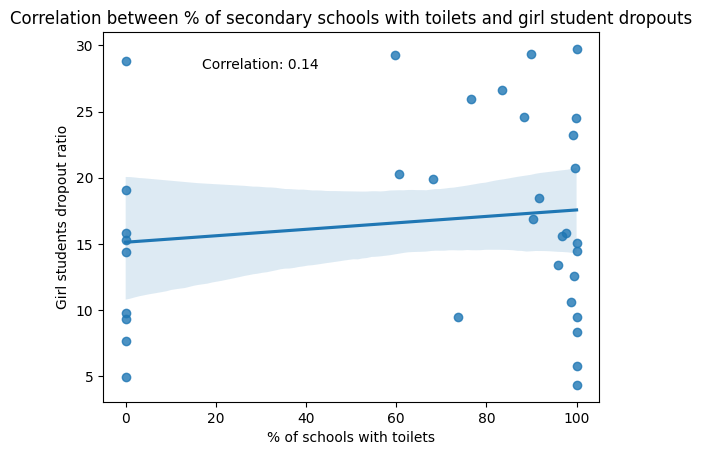

In [23]:
# Read the datasets
dropout_data = pd.read_csv("/content/dropout-ratio-2012-2015.csv")
toilet_data = pd.read_csv("/content/schools-with-girls-toilet-2013-2016.csv")

# Filter the dropout data for the academic year 2014-15
filtered_dropout_data = dropout_data[(dropout_data['year'] == '2014-15')]

# Filter the toilet data for the academic year 2014-15
filtered_toilet_data = toilet_data[(toilet_data['year'] == '2014-15')]

# Select the 'Sec_Only' column from the filtered toilet data
toilet_subset = filtered_toilet_data[['State_UT', 'Sec_Only']]

# Select the 'Secondary _Girls' column from the filtered dropout data
dropout_subset = filtered_dropout_data[['State_UT', 'Secondary _Girls']]

# Merge the datasets on 'State_UT'
merged_data = pd.merge(toilet_subset, dropout_subset, on='State_UT')

# Convert the columns to numeric values
merged_data['Sec_Only'] = pd.to_numeric(merged_data['Sec_Only'], errors='coerce')
merged_data['Secondary _Girls'] = pd.to_numeric(merged_data['Secondary _Girls'], errors='coerce')
# Drop rows with missing values
merged_data = merged_data.dropna()

# Calculate the correlation
correlation = merged_data['Sec_Only'].corr(merged_data['Secondary _Girls'])

# Create a scatter plot with regression line
sns.regplot(x='Sec_Only', y='Secondary _Girls', data=merged_data)

# Set labels and title
plt.xlabel('% of schools with toilets')
plt.ylabel('Girl students dropout ratio')
plt.title('Correlation between % of secondary schools with toilets and girl student dropouts')

# Add correlation text
plt.text(0.2, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [24]:
# Print the column names
print(comps.columns)
print(drop.columns)

Index(['State_UT', 'year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'],
      dtype='object')
Index(['State_UT', 'year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total'],
      dtype='object')


In [25]:
# Check for null values in Comp dataset
# Filter the data for the year 2014-15
filtered_data = comps[comps['year'] == '2014-15']

# Identify null values in the "Sec_Only" column
null_values = filtered_data['Sec_Only'].isnull().sum()

# Print the count of null values
print("Number of null values in Sec_Only column for 2014-15 in Comp dataset:", null_values)

#Check for null values in Dropout dataset
# Filter the data for the year 2014-15
filtered_data = drop[drop['year'] == '2014-15']

# Identify null values in the "Secondary _Girls" column
null_values = filtered_data['Secondary _Girls'].isnull().sum()

# Print the count of null values
print("Number of null values in Secondary _Girls column for 2014-15 in Drop dataset:", null_values)

Number of null values in Sec_Only column for 2014-15 in Comp dataset: 0
Number of null values in Secondary _Girls column for 2014-15 in Drop dataset: 0


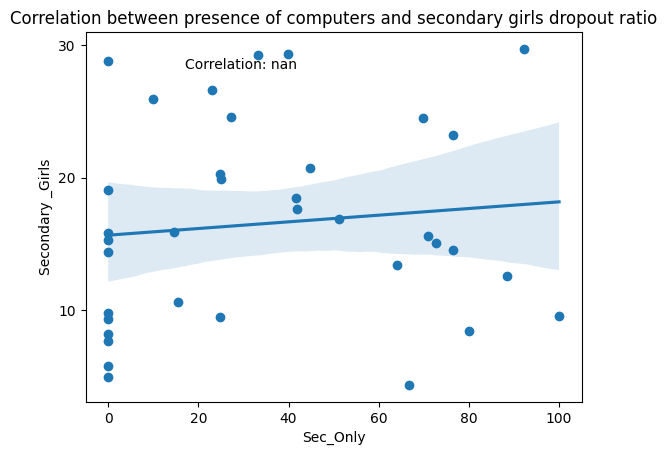

In [26]:
# Filter the data for the year 2014-15
filtered_data = comps[comps['year'] == '2014-15']
filtered_dropout_data = drop[drop['year'] == '2014-15']

# Convert data to numeric types
sec_only = pd.to_numeric(filtered_data['Sec_Only'], errors='coerce')
secondary_girls = pd.to_numeric(filtered_dropout_data['Secondary _Girls'], errors='coerce')

# Calculate the correlation
correlation = sec_only.corr(secondary_girls)

# Create a scatter plot
plt.scatter(sec_only, secondary_girls)
plt.xlabel('% of schools with computers')
plt.ylabel('Girl student dropout ratio')
plt.title('Correlation between presence of computers and secondary girls dropout ratio')

# Set custom tick values and labels for the y-axis
yticks = [40, 30, 20, 10, 0]
plt.yticks(yticks, yticks)

# Add regression line
sns.regplot(x=sec_only, y=secondary_girls, scatter=False)

plt.text(0.2, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()

In [27]:
# Print the column names
print(water.columns)

Index(['State/UT', 'Year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'],
      dtype='object')


In [28]:
# Print the column names
print(gtoilet.columns)

Index(['State_UT', 'year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'],
      dtype='object')


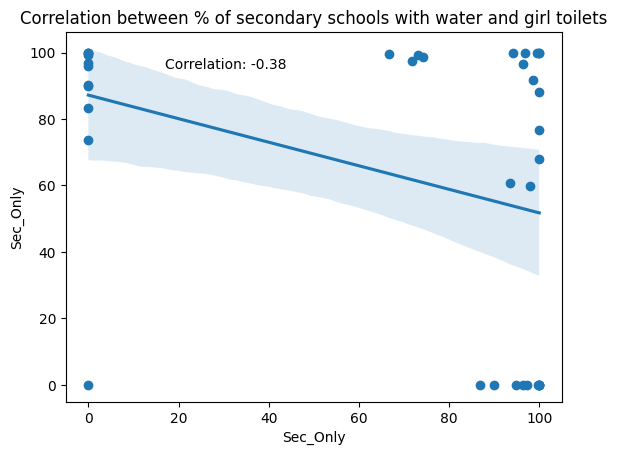

In [29]:
# Filter the data for the year 2014-15
filtered_water = water[water['Year'] == '2014-15']
filtered_gtoilet = gtoilet[gtoilet['year'] == '2014-15']

# Select the relevant columns
sec_only_water = filtered_water['Sec_Only']
sec_only_gtoilet = filtered_gtoilet['Sec_Only']

# Calculate the correlation
correlation = sec_only_water.corr(sec_only_gtoilet)

# Create a scatter plot
plt.scatter(sec_only_water, sec_only_gtoilet)
plt.xlabel('% of schools with water')
plt.ylabel('% of girls toilets')
plt.title('Correlation between % of secondary schools with water and girl toilets')
plt.text(0.2, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Add regression line
sns.regplot(x=sec_only_water, y=sec_only_gtoilet, scatter=False)

plt.show()